In [60]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

#### Social Media - Instagram Introduction

Social media today is a dynamic and influential platform that connects people, ideas, and information across the globe. Instagram stands out as one of the most widely popular social media platforms globally, and in **Indonesia** as well. We are currently in the digital era. It is undeniable.

    Social media helps individual or company to build their brand.

Boosting social media engagement is essential for businesses and companies. Benefits of social media:

*   Have a positive impact on company's profits
*   Increased Brand Visibility & Loyalty
*   Community Building
*   Promotion and Launches
*   Long-Term Growth


## NETFLIX

Netflix is a global streaming service that offers a wide variety of movies, TV shows, documentaries, and other entertainment content to subscribers for a monthly fee. It was founded in 1997 in the United States and has since grown into one of the world's most popular and recognizable streaming platforms.

Social media, notably Instagram, plays a pivotal role in helping NETFLIX to engage with its audience, promote its content, and enhance its brand presence. As of September 2021, Netflix was accessible in more than 190 countries, including **Indonesia**.

NETFLIX Indonesia's Instagram account @netflixid, currently has 1,3 million followers.
This significant number of followers can indeed serve as a critical factor in driving several important objectives such as to promote their product, heighten awareness about new content on Netflix and ultimately encourage individuals to subscribe and pay the fees because at the end of the day it is about profit.

So how Instagram account @netflixid can contribute to achieving all of those we have mentioned above? Let's dive in to the dataset of Instagram Post by NetfixId from Jan 2022 up to Feb 2023.

In [61]:
# Importing dataset
df = pd.read_excel('../MODUL 2/Social Media IG.xlsx')
df.head(1)

,id,ingestion_date,link,date,post_message,like,comments,saved,share,engagement,video_views,reach,impression,type,username
0,8495879833,2023-05-25,https://www.instagram.com/p/Co4wPXXJjku/,2023-02-20 14:00:14,"Serial yang diangkat dari kisah nyata, tentang...",10865.0,71.0,15.0,134.0,11085.0,1424,2372168,3392200,Reels,Netflixid


In [62]:
df.shape

(2613, 15)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2613 entries, 0 to 2612
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              2613 non-null   int64         
 1   ingestion_date  2613 non-null   datetime64[ns]
 2   link            2613 non-null   object        
 3   date            2612 non-null   datetime64[ns]
 4   post_message    285 non-null    object        
 5   like            2611 non-null   float64       
 6   comments        2609 non-null   float64       
 7   saved           2606 non-null   float64       
 8   share           2608 non-null   float64       
 9   engagement      2612 non-null   float64       
 10  video_views     2613 non-null   int64         
 11  reach           2613 non-null   int64         
 12  impression      2613 non-null   int64         
 13  type            2613 non-null   object        
 14  username        2613 non-null   object        
dtypes: d

#### About DATASET

*   Dataset contains information about Instagram Post by NetfixId from Jan 2022 up to Feb 2023.
*   Dataset contains 2613 rows and 15 columns.
*   Columns are 'id', 'ingestion_date', 'link', 'date', 'post_message', 'like', 'comments', 'saved', 'share',
    'engagement', 'video_views', 'reach', 'impression', 'type', 'username'.
*   Data type is already appropriate


In [64]:
# Checking empty cells
df.isna().sum()

id                   0
ingestion_date       0
link                 0
date                 1
post_message      2328
like                 2
comments             4
saved                7
share                5
engagement           1
video_views          0
reach                0
impression           0
type                 0
username             0
dtype: int64

<<>>    Column 'post_message' has so many empty (Nan) cells.

<<>>    Other columns has less than 10 empty cells.

In [65]:
# print out columns with missing value in %
for col in df.columns:
    pct = df[col].isna().mean() * 100
    if pct != 0:
        print('{} => {}'.format(col, round(pct,2)))

date => 0.04
post_message => 89.09
like => 0.08
comments => 0.15
saved => 0.27
share => 0.19
engagement => 0.04


## DATA CLEANING

In [66]:
# Renaming columns
df.rename(columns={'type' : 'content', 'post_message': 'caption'}, inplace=True)
df.head(1)

,id,ingestion_date,link,date,caption,like,comments,saved,share,engagement,video_views,reach,impression,content,username
0,8495879833,2023-05-25,https://www.instagram.com/p/Co4wPXXJjku/,2023-02-20 14:00:14,"Serial yang diangkat dari kisah nyata, tentang...",10865.0,71.0,15.0,134.0,11085.0,1424,2372168,3392200,Reels,Netflixid


### Dealing with missing values

In [67]:
df[df['date'].isna()]

,id,ingestion_date,link,date,caption,like,comments,saved,share,engagement,video_views,reach,impression,content,username
2051,8495879833,2023-05-25,https://www.instagram.com/p/CbZu_wsPqns/,NaT,NaN,2348.0,18.0,198.0,87.0,2651.0,0,384581,488418,Carousels,Netflixid


In [68]:
# Checking date column value.  
df.loc[2048:2052]

,id,ingestion_date,link,date,caption,like,comments,saved,share,engagement,video_views,reach,impression,content,username
2048,8495879833,2023-05-25,https://www.instagram.com/p/CbbWBdahNOo/,2022-03-23 01:05:16,NaN,18091.0,332.0,106.0,70.0,18599.0,0,1069443,2031942,Picture,Netflixid
2049,8495879833,2023-05-25,https://www.instagram.com/p/CbaJ_fyBmm7/,2022-03-22 14:00:48,NaN,8702.0,139.0,194.0,104.0,9139.0,0,747387,1188345,Carousels,Netflixid
2050,8495879833,2023-05-25,https://www.instagram.com/p/CbZ8LyIv4A3/,2022-03-22 12:00:01,NaN,7521.0,108.0,114.0,93.0,7836.0,0,1394416,2649390,Carousels,Netflixid
2051,8495879833,2023-05-25,https://www.instagram.com/p/CbZu_wsPqns/,NaT,NaN,2348.0,18.0,198.0,87.0,2651.0,0,384581,488418,Carousels,Netflixid
2052,8495879833,2023-05-25,https://www.instagram.com/p/CbZgvNXhcMK/,2022-03-22 08:00:11,NaN,39140.0,249.0,196.0,165.0,39750.0,0,3880793,6364501,Picture,Netflixid


In [69]:
# Date is time to post content. 
# Replacing Nan in 'date' column with the same value as the last posted date.
df['date'].fillna(df['date'].loc[2050], inplace=True)

In [70]:
#Replacing Nan in 'engagement' column with the sum of like, comment, saved and share.

df['engagement'].fillna(df['like'] + df['comments'] + df['saved'] + df['share'], inplace=True)

In [71]:
#Replacing Nan in other columns.
df.fillna({'caption':'No Caption','like': 0, 'comments': 0,'saved':0, 'share' : 0}, inplace=True)
df.isna().sum()

id                0
ingestion_date    0
link              0
date              0
caption           0
like              0
comments          0
saved             0
share             0
engagement        0
video_views       0
reach             0
impression        0
content           0
username          0
dtype: int64

In [72]:
df.duplicated().sum()

11

In [73]:
#delete duplicate data
df.drop_duplicates(inplace=True)

In [74]:
df.duplicated().sum()

0

In [75]:
#Delete column we won't use.
colum_to_delete = ['id', 'ingestion_date','username']
df.drop(colum_to_delete, axis = 1, inplace=True)
df.head(1)

,link,date,caption,like,comments,saved,share,engagement,video_views,reach,impression,content
0,https://www.instagram.com/p/Co4wPXXJjku/,2023-02-20 14:00:14,"Serial yang diangkat dari kisah nyata, tentang...",10865.0,71.0,15.0,134.0,11085.0,1424,2372168,3392200,Reels


In [76]:
df.shape

(2602, 12)

## DATA ANALYTIC & VISUALIZATION

In [77]:
df.describe().round()

,like,comments,saved,share,engagement,video_views,reach,impression
count,2602.0,2602.0,2602.0,2602.0,2602.0,2602.0,2602.0,2602.0
mean,11759.0,180.0,99.0,102.0,12144.0,808.0,1599547.0,2570057.0
std,11984.0,292.0,57.0,58.0,12192.0,868.0,1745547.0,2933553.0
min,0.0,0.0,0.0,0.0,93.0,0.0,8254.0,10400.0
25%,3679.0,35.0,49.0,53.0,3926.0,0.0,531251.0,827294.0
50%,7828.0,92.0,98.0,100.0,8138.0,0.0,1041160.0,1643082.0
75%,15461.0,211.0,148.0,152.0,15828.0,1498.0,1994166.0,3158422.0
max,115401.0,7481.0,200.0,200.0,117665.0,2498.0,17572566.0,32684973.0


From the statistic description, we can spot the following issues:
*   There are video_views with 0. It due to the content is not video based.
*   The max of engagement, reach and  impression are so high comapre to mean and 75% quartile. Have to check and focus on this category.

### Engagement VS Impression VS Reach
**Engagement**:
Measures user interactions with a post, such as likes, comments, saved and share, etc.

**Impression**:
Represents the number of times a post is displayed on users' screens.

**Reach**:
Indicates the number of unique users who have seen a post.

Engagement is the most important of the three metrics to pay attention to when we are measuring social media success. 

    This is because engagement is the only one of the three terms to involve the user directly.
    "Having someone simply see your content is one thing, but involving them and moving them to take action is another"

In [78]:
# How is the distribution of each content ?
content_number = df['content'].value_counts().reset_index().rename(columns={'index':'content','content':'number_of_content'})
content_number

,content,number_of_content
0,Picture,665
1,Videos,648
2,Reels,647
3,Carousels,642


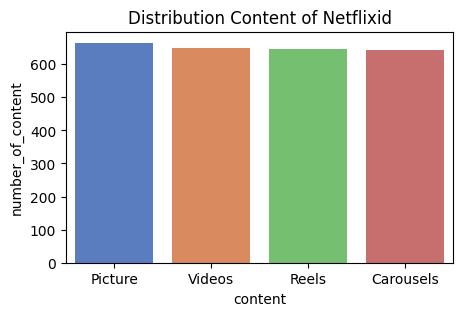

In [79]:
plt.figure(figsize=(5,3))
plt.title('Distribution Content of Netflixid')
sns.barplot(data=content_number, x = 'content',
            y= 'number_of_content',
            palette='muted')
plt.show()

<<>>    Instagram offers various features for sharing different types of content to engage with users such as:

    Picture : single images
    Reels   : short-form videos
    Videos  : dynamic content that can be uploaded as posts or shared on Stories, IGTV
    Carousel : a post format that allows you to share multiple images or videos in a single post

<<>>    Distribution is almost same in each type of content. Netflixid post type of content equally.

In [80]:
# How is the distribution of each content based on engagement, reach, impression?
content_avg= df.groupby('content')[['engagement','reach','impression']].mean().reset_index()
content_avg.round()

,content,engagement,reach,impression
0,Carousels,11938.0,1485778.0,2368712.0
1,Picture,11713.0,1437015.0,2320367.0
2,Reels,12285.0,1683064.0,2712377.0
3,Videos,12649.0,1795669.0,2883678.0


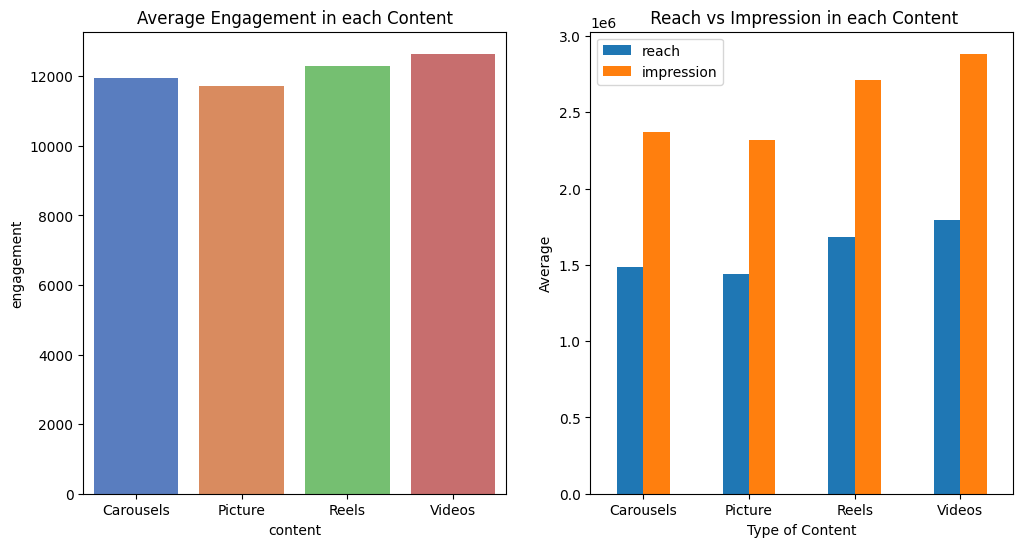

In [81]:
fig, axes = plt.subplots(1,2, figsize=(12,6))
sns.barplot(data=content_avg, x = 'content',
            y= 'engagement',
            palette='muted', ax=axes[0])
axes[0].set_title('Average Engagement in each Content')
content_avg.plot(kind='bar', x='content',
                 y=['reach','impression'],ax=axes[1])
plt.xlabel('Type of Content')
plt.ylabel('Average')
for tick in plt.gca().get_xticklabels():
    tick.set_rotation(0)
axes[1].set_title(' Reach vs Impression in each Content')
plt.show()

<<>>    There is no significant difference of average engagement per content.

<<>>    There is no significant difference of average reach per content.

<<>>    Reels and videos are receiving a higher average impression compare to picture and carousels.

<<>>    Reels/videos getting more impression could be **because users generally like enjoying creative and beautiful content.
 since tiktok became popular, instagram reels have also getting enyobale.** 

<<>>    There is **significant gap between impression vs reach in each content**. This means that everytime a post is display or delivered into user's screen, they might not actually see the content.
        
        This needs to be minimized to enhance user awareness of the content and also boost engagement.
        The Goal is how to increase ENGAGEMENT in every post.

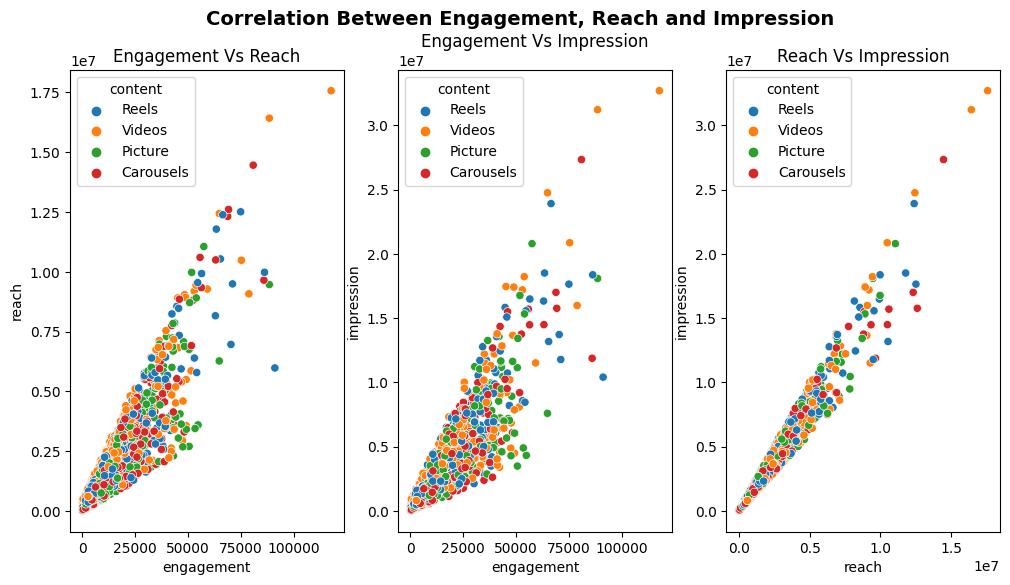

In [82]:
# How is the correaltion between engagement, reach, impression ?
fig, axes = plt.subplots(1,3, figsize=(12,6))
fig.suptitle('Correlation Between Engagement, Reach and Impression', size = 14, fontweight= 'bold')
sns.scatterplot(data= df, 
                x= 'engagement', 
                y= 'reach', 
                hue= 'content', ax=axes[0])
axes[0].set_title('Engagement Vs Reach')
sns.scatterplot(data= df, 
                x= 'engagement', 
                y= 'impression', 
                hue= 'content', ax=axes[1])
axes[1].set_title('Engagement Vs Impression')
sns.scatterplot(data= df, 
                x= 'reach', 
                y= 'impression', 
                hue= 'content', ax=axes[2])
axes[2].set_title('Reach Vs Impression')
plt.show()

    >>> The correlation between engagement, reach and impression ALL demonstrate a positive relationship.

In [83]:
# Creating new column 'month_post', 'week_post', 'day_post' and 'hour_post'

df['monthyear_post'] = df['date'].dt.to_period('M')
df['date_post'] = df['date'].dt.date
df['week_post'] = df['date'].dt.strftime('%U')
df['day_post'] = df['date'].dt.strftime('%A')
df['hour_post'] = df['date'].dt.strftime('%H')
df.head(1)

,link,date,caption,like,comments,saved,share,engagement,video_views,reach,impression,content,monthyear_post,date_post,week_post,day_post,hour_post
0,https://www.instagram.com/p/Co4wPXXJjku/,2023-02-20 14:00:14,"Serial yang diangkat dari kisah nyata, tentang...",10865.0,71.0,15.0,134.0,11085.0,1424,2372168,3392200,Reels,2023-02,2023-02-20,08,Monday,14


### Checking the lowest and the highest engagement

In [84]:
low_engagement = df[['link','engagement','reach','impression','content','day_post','hour_post']].sort_values('engagement').head(10)
low_engagement

,link,engagement,reach,impression,content,day_post,hour_post
1934,https://www.instagram.com/reel/CcCOjXGLuKQ/,93.0,12337,22823,Picture,Thursday,03
1661,https://www.instagram.com/reel/Cdzkv83NEoC/,98.0,12717,23018,Carousels,Saturday,03
1907,https://www.instagram.com/reel/CcMjIwzs7vC/,117.0,8254,10400,Carousels,Monday,03
1906,https://www.instagram.com/reel/CcMjJonN-cN/,121.0,20353,39892,Picture,Monday,03
2169,https://www.instagram.com/reel/Caydhhetil8/,139.0,189197,359474,Videos,Monday,04
1710,https://www.instagram.com/reel/CdfAbYltBhY/,145.0,103578,195762,Reels,Friday,04
2428,https://www.instagram.com/reel/CZYkH9So3Ji/,151.0,20525,41050,Picture,Monday,06
2139,https://www.instagram.com/reel/Ca8tDWBJMwt/,152.0,200624,314980,Videos,Friday,03
1800,https://www.instagram.com/reel/Cc0DKkTpD8E/,168.0,288446,424016,Reels,Tuesday,11
1687,https://www.instagram.com/reel/CdpSPassDkY/,171.0,31476,42493,Carousels,Tuesday,04


In [85]:
high_engagement = df[['link','engagement','reach','impression','content','day_post','hour_post']].sort_values('engagement', ascending=False).head(10)
high_engagement

,link,engagement,reach,impression,content,day_post,hour_post
1520,https://www.instagram.com/p/Ceth839BwC_/,117665.0,17572566,32684973,Videos,Sunday,16
1394,https://www.instagram.com/p/CftBymKBsC1/,91065.0,5978663,10402874,Reels,Thursday,08
1077,https://www.instagram.com/p/Ch4gPdPBXkC/,88455.0,16425037,31207570,Videos,Tuesday,12
995,https://www.instagram.com/p/CicH5SOPbxV/,88438.0,9466404,18080832,Picture,Tuesday,08
2295,https://www.instagram.com/p/CaFaExghapn/,86160.0,9979820,18362869,Reels,Thursday,16
1560,https://www.instagram.com/p/CefJV6EhBUB/,85884.0,9650785,11870466,Carousels,Tuesday,02
2413,https://www.instagram.com/p/CZd6mJnBGc0/,80835.0,14459765,27328956,Carousels,Wednesday,08
2105,https://www.instagram.com/p/CbHtBDDhXro/,78783.0,9078734,15978572,Videos,Tuesday,10
2405,https://www.instagram.com/p/CZgtLw5Mwo1/,75259.0,10482613,20860400,Videos,Thursday,10
131,https://www.instagram.com/p/CoClSb5pz54/,74895.0,12509768,17638773,Reels,Monday,13


After examine the data and actually see the post based on the link. We conclude several point:

    Top lowest engagement:
*   Different type of content. Overall content is interesting, creative and catchy.
*   Hour posting. lowest engagement are mostly posted at 3 and 4 am !!!
*   Day posting doesn't show significant difference.

    Top highest engagement:
*   Content mostly about announcement !! 1st Squid game s2 announcement, stanger things, 1898, all of us dead s2, one piece, etc
*   Content about Meme ! catchy caption!
*   Hour posting above 8am.

#### Based on the comparison:
*   It becomes clear that the type of content shouldn't be taken as a determining factor of engagement. The type of content doesn't seem to have a substantial impact on the engagement numbers, despite the fact that the three lowest-performing posts were actually reels, this content known for its wider reach potential through the algorithm. 

*   As a result, it seems that reels might primarily contribute to impressions.

*   In terms of posting days, there doesn't appear to be any specific day that consistently produce the lowest or highest engagement.

*   **The critical factor here is the timing of posting, particularly the hour of posting content.** This aspect significantly influences the engagement of each post.

In [86]:
# Checking the consistency of posting by Netflixid 
count_monthly_post = df.groupby('monthyear_post')['link'].count().reset_index().rename(columns={'monthyear_post': 'month','link':'number of post'})
count_monthly_post.head()

,month,number of post
0,2022-01,187
1,2022-02,206
2,2022-03,238
3,2022-04,207
4,2022-05,174


In [87]:
count_weekly_post = df.groupby('week_post')['link'].count().reset_index().rename(columns={'week_post': 'number of week','link':'number of post'})
count_weekly_post.head()

,number of week,number of post
0,00,6
1,01,85
2,02,85
3,03,88
4,04,86


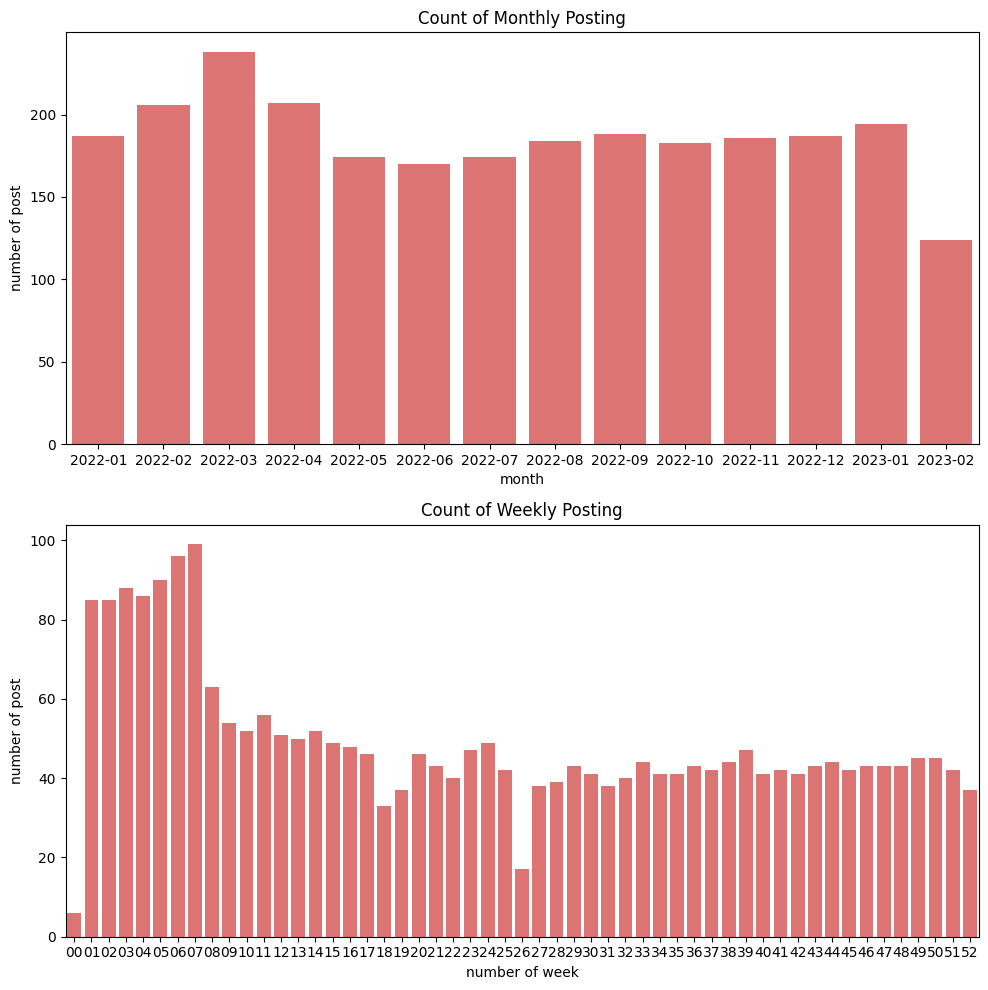

In [88]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
colors = ['#EF6262']
sns.barplot(data = count_monthly_post, x='month',
            y= 'number of post',
            palette= colors, ax=axes[0])
axes[0].set_title('Count of Monthly Posting')

sns.barplot(data = count_weekly_post, x= 'number of week',
            y= 'number of post',
            palette= colors, ax=axes[1])
axes[1].set_title('Count of Weekly Posting')
plt.tight_layout()
plt.show()

<<>>    There is no significant gap between each month in monthly posting from Netflixid.

<<>>    There is an inconsistnecy by weekly posting in 7 week at the beginning of the data compare to all or 52 weeks.

In [89]:
count_date_post = df.groupby('date_post')['link'].count().reset_index().rename(columns={'link':'number of post'})
count_date_post.head()

,date_post,number of post
0,2022-01-01,6
1,2022-01-02,6
2,2022-01-03,6
3,2022-01-04,6
4,2022-01-05,5


In [90]:
count_day_post= df.groupby('day_post')['link'].count().reset_index().sort_values('link', ascending=False).rename(columns={'link':'number of post'})
count_day_post

,day_post,number of post
0,Friday,409
1,Monday,405
5,Tuesday,401
4,Thursday,397
6,Wednesday,394
2,Saturday,322
3,Sunday,274


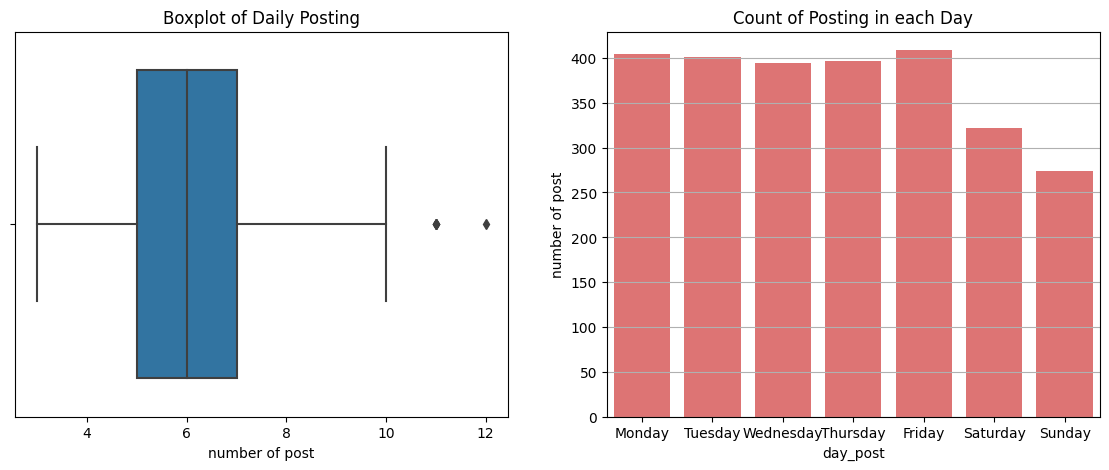

In [91]:
fig, axes = plt.subplots(1,2, figsize=(14,5))
plt.title('Boxplot of Daily Posting')
plt.grid()
sns.boxplot(data=count_date_post, x= 'number of post', ax=axes[0])
axes[0].set_title('Boxplot of Daily Posting')
colors = ['#EF6262']
order_day =['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sns.barplot(data = count_day_post, x='day_post',
            y= 'number of post', order = order_day,
            palette= colors, ax=axes[1])
axes[1].set_title('Count of Posting in each Day')
plt.show()

<<>>    NetflixId sticks to a **consisten**t daily posting schedule. 

<<>>    Although there are three days that stand out as outliers.

<<>>    NetflixId is also consistently posting or sharing content by day. Weekend has lower number of post compare to weekday.

<<>>    Seems like the social media specialist also deserves a rest on the weekend. It's all about Work Life Balance.

In [92]:
# How is the correaltion between engagement, reach, impression each day?
day_post_avg = df.groupby('day_post')['engagement','reach','impression'].mean().reset_index()
day_post_avg.round()

/var/folders/xw/mw3dy2ks2z11gm1xj184b5zc0000gn/T/ipykernel_1493/1560140467.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  day_post_avg = df.groupby('day_post')['engagement','reach','impression'].mean().reset_index()


,day_post,engagement,reach,impression
0,Friday,12195.0,1655433.0,2663306.0
1,Monday,13721.0,1802381.0,2840282.0
2,Saturday,9471.0,1301708.0,2079096.0
3,Sunday,9405.0,1179586.0,1864927.0
4,Thursday,12855.0,1671821.0,2708683.0
5,Tuesday,13318.0,1755416.0,2833552.0
6,Wednesday,12647.0,1637038.0,2679240.0


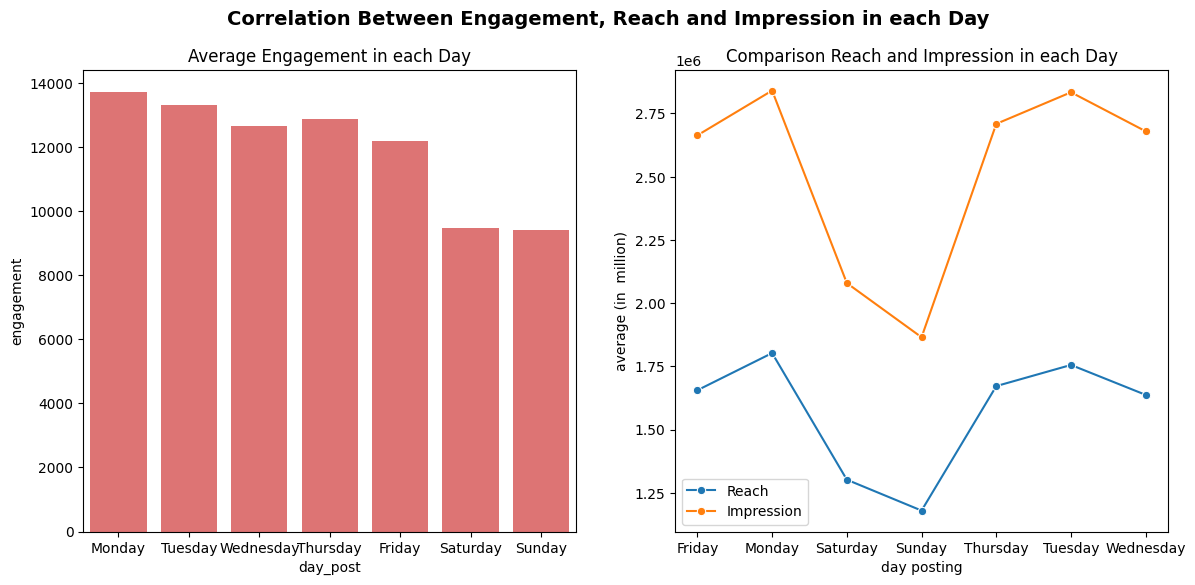

In [93]:
fig, axes = plt.subplots(1,2, figsize=(14,6))
fig.suptitle('Correlation Between Engagement, Reach and Impression in each Day', size = 14, fontweight= 'bold')
colors = ['#EF6262']
order_day =['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sns.barplot(data = day_post_avg, x='day_post',
            y= 'engagement', order = order_day,
            palette= colors, ax=axes[0])
axes[0].set_title('Average Engagement in each Day')
sns.lineplot(data= day_post_avg, x= 'day_post', y= 'reach',
         marker = 'o', label= 'Reach', ax=axes[1]) 
sns.lineplot(data= day_post_avg, x= 'day_post', y= 'impression',
         marker = 'o', label= 'Impression', ax=axes[1])
axes[1].set_title('Comparison Reach and Impression in each Day')
axes[1].set_xlabel('day posting')
axes[1].set_ylabel('average (in  million)')
axes[1].legend(loc=0)

plt.show()

<<>>    Average engagement, reach and impression per day follow a consistent pattern, decreasing during the weekends.

<<>>    This is happened likely due to the lower number of posts on weekends compared to weekdays.

In [94]:
# Checking the consistency of posting by Netflixid per hour. 
# as we already mentioned that Hour Posting is crucial to boost engagement!
hour_posting= df.groupby('hour_post')['link'].count().reset_index().rename(columns={'link':'number of post'})
hour_posting

,hour_post,number of post
0,00,5
1,01,5
2,02,169
3,03,35
4,04,393
5,05,13
6,06,422
7,07,28
8,08,402
9,09,16


In [95]:
content_hour_post= df.groupby('hour_post')['content'].value_counts().reset_index(name='count')

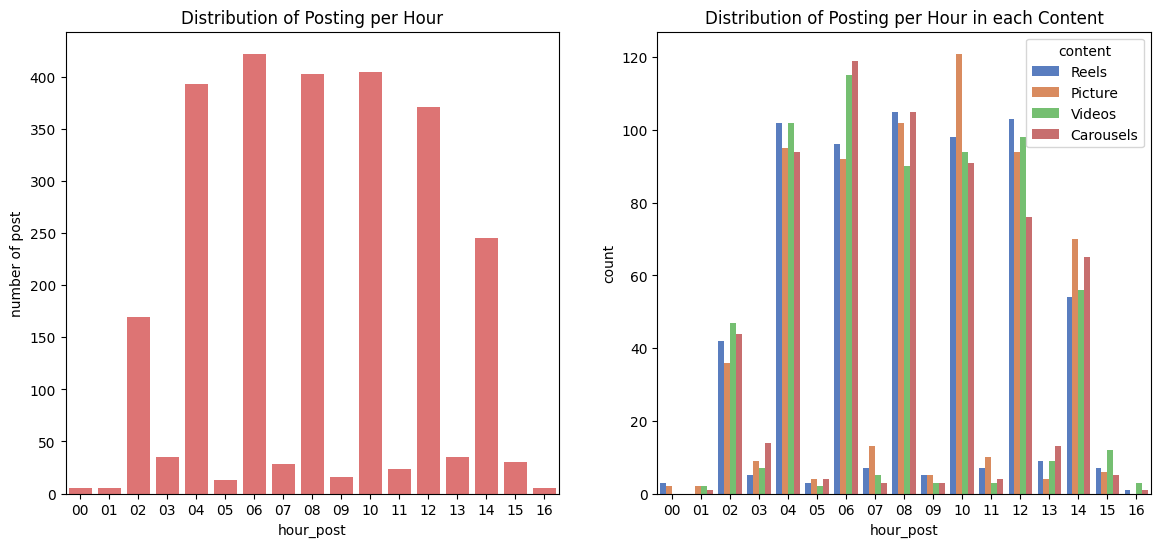

In [96]:
fig, axes = plt.subplots(1,2, figsize=(14,6))
colors = ['#EF6262']
sns.barplot(data = hour_posting, x='hour_post',
            y= 'number of post',
            palette= colors, ax=axes[0])
axes[0].set_title('Distribution of Posting per Hour')
sns.barplot(data = content_hour_post, x='hour_post',
            y= 'count',
            palette= 'muted', hue= 'content', ax=axes[1])
axes[1].set_title('Distribution of Posting per Hour in each Content')
plt.show()

<<>>    NetflixId tends to post on their account before 7 am. This might not be a good move because people aren't very active during this time.

<<>>    The upcoming post consistently surpasses the previous one by a considerable margin each time.

<<>>    As we can see from the distribution of content, NetflixId has posted nearly an equal amount for each type of content. Moreover, based on posts per hour, we can observe that they don't limit themselves to posting only one type of content.

In [97]:
#Checking correlation between day and hour posting with heatmap
heat_hour = pd.crosstab(df['day_post'], df['hour_post'])
heat_hour

hour_post,00,01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16
day_post,,,,,,,,,,,,,,,,,
Friday,1,3,37,5,59,3,62,5,61,2,56,4,55,5,45,6,0
Monday,1,0,27,7,61,1,63,3,59,4,59,3,60,5,46,4,2
Saturday,0,0,3,3,58,3,59,5,55,3,60,2,57,4,7,2,1
Sunday,0,0,2,0,50,0,57,5,54,1,56,1,35,4,8,0,1
Thursday,0,0,35,10,50,3,58,4,58,4,57,6,52,7,44,8,1
Tuesday,1,0,31,7,58,2,65,2,59,1,57,3,58,4,48,5,0
Wednesday,2,2,34,3,57,1,58,4,56,1,59,5,54,6,47,5,0


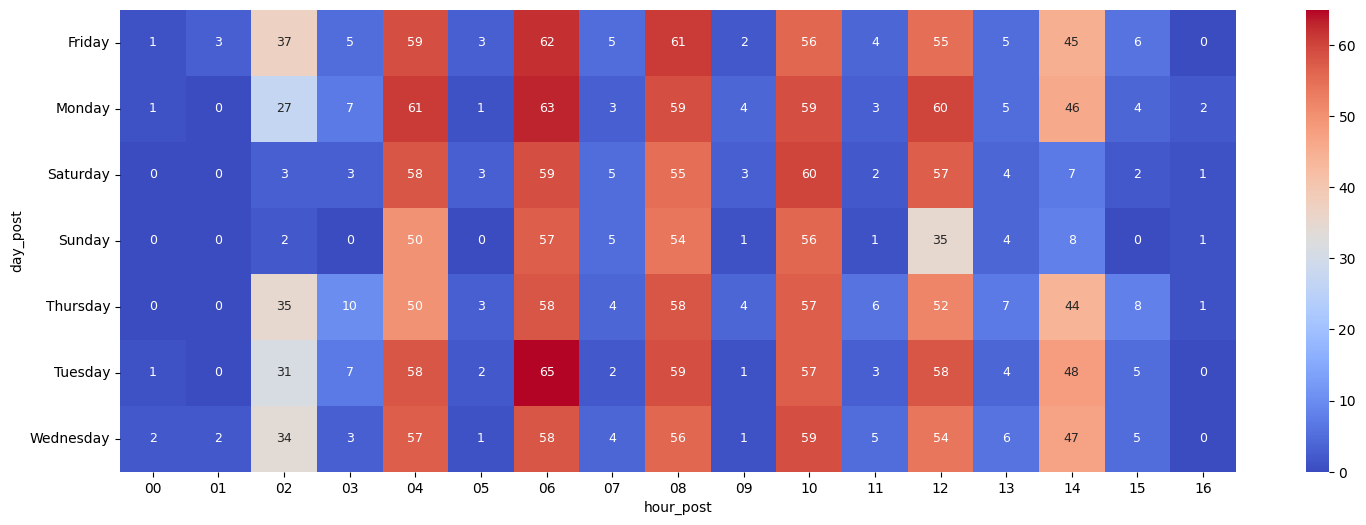

In [98]:
plt.figure(figsize=(18,6))
sns.heatmap(heat_hour, annot=True, 
            annot_kws={'size':9}, fmt='.0f',
            cmap='coolwarm')

plt.show()

<<>>    Based on heatmap we also can observe a significant posting pattern by hour and day. 

<<>>    There is a consistent trend where  NetflixId shares multiple posts at 4, 6, 8, 10 am & 12, 2 pm.

In [99]:
# How is the correaltion between engagement, reach, impression each hour?
hour_post_avg = df.groupby('hour_post')[['engagement','reach','impression']].mean().reset_index()
hour_post_avg.head().round()

,hour_post,engagement,reach,impression
0,00,26811.0,3074226.0,4970340.0
1,01,25244.0,2933053.0,4891055.0
2,02,16968.0,2268917.0,3614903.0
3,03,8933.0,1239223.0,2093594.0
4,04,11950.0,1617752.0,2555021.0


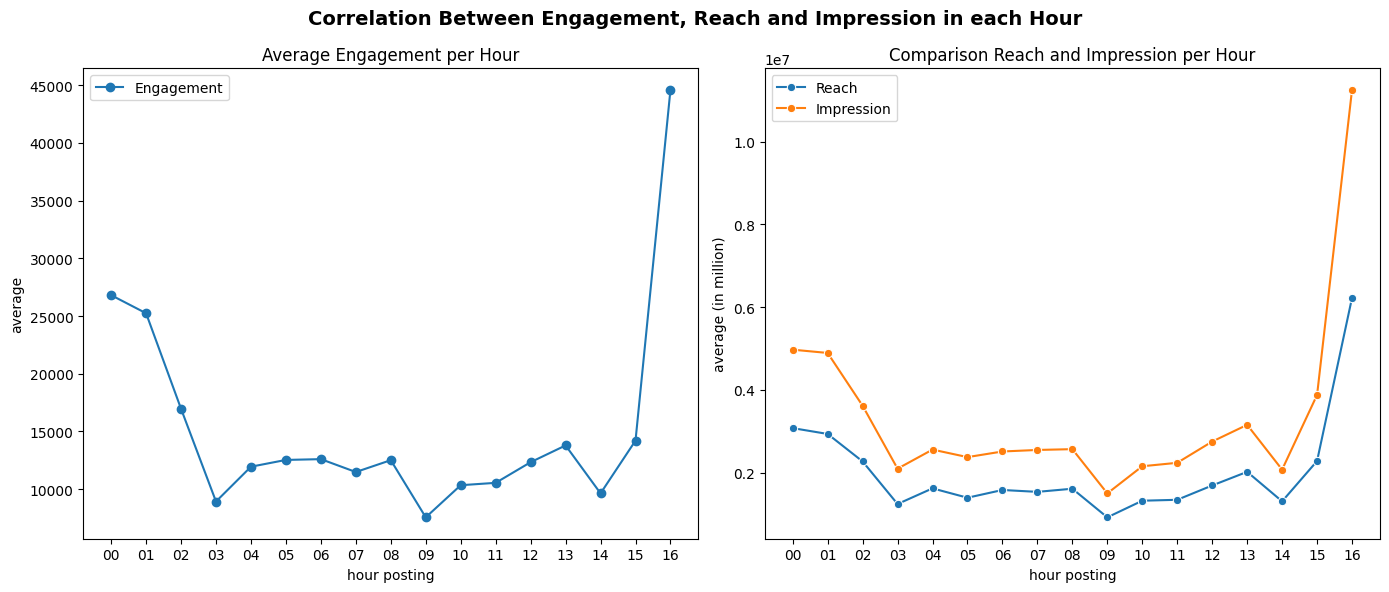

In [100]:
fig, axes = plt.subplots(1,2, figsize=(14,6))
fig.suptitle('Correlation Between Engagement, Reach and Impression in each Hour', size = 14, fontweight= 'bold')
axes[0].plot(hour_post_avg['hour_post'], hour_post_avg['engagement'],
         marker = 'o', label= 'Engagement') 
axes[0].set_xlabel('hour posting')
axes[0].set_ylabel('average')
axes[0].legend(loc=0)
axes[0].set_title('Average Engagement per Hour')

sns.lineplot(data= hour_post_avg, x='hour_post', y='reach',
         marker = 'o', label= 'Reach', ax=axes[1]) 
sns.lineplot(data= hour_post_avg, x= 'hour_post', y='impression',
         marker = 'o', label= 'Impression', ax=axes[1])
axes[1].set_title('Comparison Reach and Impression per Hour')
axes[1].set_xlabel('hour posting')
axes[1].set_ylabel('average (in million)')
axes[1].legend(loc=0)
plt.tight_layout()
plt.show()


<<>>    Engagement, reach and impression have the same pattern.

<<>>    Each Engagement, reach and impression increase SIGNIFICANTLY after 2pm.

<<>>    Starting from 1 am, there's a consistent decrease. And there isn't any noticeable improvement until before 2 pm.

## CONCLUSION

*   The overall content is creative, catchy, includes many relatebale memes, etc.
*   NetflixId has posted nearly an equal amount for each type of content.
*   They have consistentcy in posting content monthly, weekly and daily.
*   Engagement, reach and impression ALL demonstrate a positive relationship. But it doesn't indicate any favorable outcome as there is a significant gap between these categories. We can say that every time a post displayed on user's screen, they don't always see the content or even interact by give comment, like saved or share.
*   Based on correaltion between engagement, reach and impression per hour, each category increase SIGNIFICANTLY after 2pm. However from distribution of posts per hour we can see that Netflixtid didn't post much content after 2pm. Surprisingly, 4pm has the lowest frequency.

### RECOMMENDATION :
When is The best times to post on Instagram ?

There are many theories on the best time to post on social media platforms. According to Kolowich (2018), the best time to post on Instagram was Monday and Thursday between 3 and 4 p.m. 
According to many authors, Thursday seemed to be a consistent good day to post from all of the recommendations reviewed. 
Interestingly, the best time to post on weekends is between 12 and 1 a.m. (Kolowich, 2018)
    
    Based on this data, to BOOST engagement on their Instagram account, NetflixID should consider change their CONTENT POSTING SCHEDULE on an hourly basis.
    Users tend to be most active after 2 pm, and THEY DIDN'T POST MUCH CONTENT AT THIS TIME.
    Increase the frequency of posts during prime hours, which typically range from after 2 pm until before midnight.



### How to Maximize Engagement 📈
    Post Consistently and in THE RIGHT TIME 🥇
    Create and post relatable memes 🤡
    Create High-Quality Content 💯
    Use Hashtags Strategically #️⃣
    Engage with users. Respond to comments, show appreciation, answer questions 🤙
    Collaborate with Actors/Influencers 🕺

### Use Instagram Insights

    It offers valuable analytics and data about your Instagram account's performance, audience, and content

In [101]:
# exporting data clean
# csv_filename = 'NetflixID_Instgram_Post_Act.csv'
# df.to_csv(csv_filename, index=False)